<a href="https://colab.research.google.com/github/Alejandrooct/AI-course/blob/main/AI_course_day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## AI course
##Assignement for day#2 (Wednesday November 29, 2023)

name: Alejandro Thamm

1 - Python code generation using ChatGPT prompts. Using the Keras library, make a Neural Network (NN) that given a Centigrade temperature will predict the Farenheit equivalent.
The dataset will have only 10 samples.
We will run 500 epochs.


In [ ]:
# Step 0 - Make some analysis of what is being requested.

# We will make a table (dataset) to work with.
#   It will have 2 columns: C and F.
#   C will be a temperature in Celsius (centigrades). (°C)
#   F will be a temerature in Farenheit. (°F)
#   This table will have 10 rows (pairs of values).
#   For the C values we will use random numbers between -0 °C and 100 °C.
#   For the F values we will use the well known formula of conversion:
#     F = (C × 1.8) + 32
# We will generate this dataset using ChatGPT prompts.


In [ ]:
# Step 0 - ChatGPT prompt:

User
# Ignore all previous instructions.
# Act as a world class python programmer.
# Write code for a google colab notebook in python.
# Make a table with 2 columns, and 10 rows.
# First column (we will call it C) should be random values between 0 and 100.
# Second column (we will call it F) will be F = 32 + (C * 1.8).
# Print this table.
# Save into a csv file named: C_F_dataset_10.csv.
# Make a scatter plot with axis C and F, and plot as small dots.
# The C axis should range from -40 to  140.
# Make the F axis in the range from -40 to  284.


Table:
    C      F
0  51  123.8
1  92  197.6
2  14   57.2
3  71  159.8
4  60  140.0
5  20   68.0
6  82  179.6
7  86  186.8
8  74  165.2
9  74  165.2


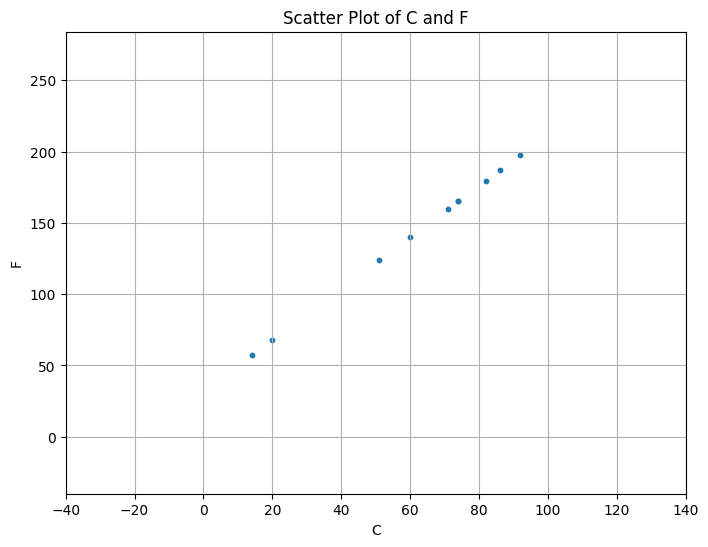

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate random values for column C
np.random.seed(42)  # for reproducibility
C_values = np.random.randint(0, 101, 10)

# Calculate corresponding values for column F
F_values = 32 + (C_values * 1.8)

# Create a DataFrame
df = pd.DataFrame({'C': C_values, 'F': F_values})

# Print the table
print("Table:")
print(df)

# Save to a CSV file
df.to_csv('C_F_dataset_10.csv', index=False)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['C'], df['F'], s=10, marker='o')
plt.title('Scatter Plot of C and F')
plt.xlabel('C')
plt.ylabel('F')
plt.xlim(-40, 140)
plt.ylim(-40, 284)
plt.grid(True)
plt.show()




---



Step 1 - Python code generation using ChatGPT prompts.
Using the Keras library, make a Neural Network (NN) that given a Centigrade temperature will predict the Farenheit equivalent.
The dataset is read from a csv file generate in the previous step (step 0).
We will run 500 epochs.

In [ ]:
# Step 1

# Earlier attempts sometimes failed, since ChatGPT when reading the values in
# the dataset, sometimes generates code that will read them as values, and
# sometimes generates code to read them as strings.
# To avoid this error, I added a clause to ChatGPT, as follows:
# When reading the dataset into a dataframe, do not include the directive: "header=None"

# ChatGPT prompt:

# Ignore all previous instructions.
# Act as a world class python programmer.
# Write code for a google colab notebook in python.
# Use the keras python library.
# Read the dataset from the local file: '/content/C_F_dataset_10.csv'
# When reading the dataset into a dataframe, do not include the directive: "header=None"
# First column will be C values, and the second column will be F values.
# When compiling the model, use 'adam' as optimizer, and 'mean_squared_error' as loss function.
# Run 500 epochs.
# Make predictions for F, the following values of C: 0, 20, 40, 60, 80, 100.
# Make a scatter plot with axis C and F, plot the training data as small dots in green.
# Make a scatter plot with axis C and F, plot the predictions, as small dots in red
# Plot also the function F = 32 + (C * 1.8) for C in the range (0, 100), as a thin green line.
# The C axis should range from -40 to  140.
# Make the F axis in the range from -40 to  284.


1/1 [==============================] - 0s 39ms/step


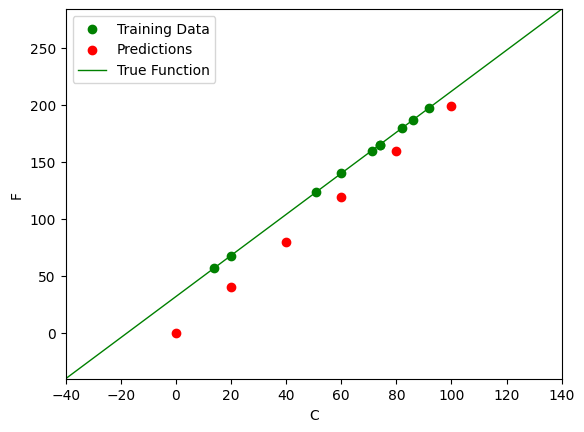

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
file_path = '/content/C_F_dataset_10.csv'
#f = pd.read_csv(file_path, header=None, names=['C', 'F'])
df = pd.read_csv(file_path)


# Define the model
model = Sequential()
model.add(Dense(units=1, input_dim=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Prepare data for training
X_train = df['C'].values.reshape(-1, 1)
y_train = df['F'].values.reshape(-1, 1)

# Train the model
model.fit(X_train, y_train, epochs=500, verbose=0)

# Make predictions for C values: 0, 20, 40, 60, 80, 100
C_values = np.array([0, 20, 40, 60, 80, 100]).reshape(-1, 1)
predicted_F_values = model.predict(C_values)

# Plot the training data
plt.scatter(df['C'], df['F'], color='green', label='Training Data')

# Plot the predictions
plt.scatter(C_values, predicted_F_values, color='red', label='Predictions')

# Plot the function F = 32 + (C * 1.8)
C_range = np.arange(-40, 141, 1).reshape(-1, 1)
true_F_values = 32 + (C_range * 1.8)
plt.plot(C_range, true_F_values, color='green', linestyle='-', linewidth=1, label='True Function')

# Set axis limits
plt.xlim(-40, 140)
plt.ylim(-40, 284)

# Add labels and legend
plt.xlabel('C')
plt.ylabel('F')
plt.legend()

# Show the plot
plt.show()
